In [ ]:
pip install pandas openpyxl


In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jartest.xlsx to jartest.xlsx


In [ ]:
df = pd.read_excel('jartest.xlsx', engine='openpyxl')
df.head()

,Date,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,31/12/2019,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,31/12/2019,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,31/12/2019,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,31/12/2019,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,31/12/2019,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5106 non-null   object 
 1   Raw_Turbidity  5106 non-null   float64
 2   Raw_PH         5106 non-null   float64
 3   Raw_Colour     5106 non-null   float64
 4   PAC            5106 non-null   float64
 5   KMnO4          5106 non-null   float64
 6   ACD            5106 non-null   float64
 7   Turbidity      5106 non-null   float64
 8   PH             5106 non-null   float64
 9   Colour         5106 non-null   float64
dtypes: float64(9), object(1)
memory usage: 399.0+ KB


In [ ]:
df.describe()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,82.015687,7.096287,337.194438,3.220966,0.355294,0.398956,16.363012,7.126557,44.004381
std,99.206050,0.394534,141.087871,1.476000,0.192873,0.266119,12.084672,0.321316,43.298547
min,2.100000,6.190000,20.000000,0.100000,0.080000,0.100000,0.430000,6.150000,1.000000
25%,24.600000,6.810000,195.000000,2.000000,0.180000,0.250000,9.072500,6.910000,18.000000
50%,43.500000,7.000000,328.000000,3.000000,0.350000,0.350000,13.800000,7.020000,31.000000
75%,89.600000,7.470000,500.000000,4.375000,0.500000,0.500000,20.200000,7.400000,50.000000
max,500.000000,8.990000,500.000000,8.500000,0.950000,3.000000,122.300000,8.990000,311.000000


In [ ]:
df.columns

Index(['Date', 'Raw_Turbidity', 'Raw_PH', 'Raw_Colour', 'PAC', 'KMnO4', 'ACD',
       'Turbidity', 'PH', 'Colour'],
      dtype='object')

In [ ]:
df = df.drop(['Date'], axis=1)

In [ ]:
df.head()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [ ]:
df.isnull().sum()

,0
Raw_Turbidity,0
Raw_PH,0
Raw_Colour,0
PAC,0
KMnO4,0
ACD,0
Turbidity,0
PH,0
Colour,0


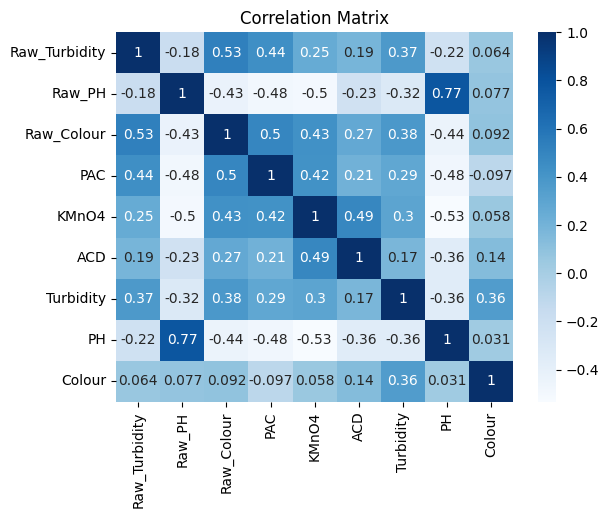

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

#Analyzing Turbidity with 6 features

**#Rawcolour vs Turbidity**

In [ ]:
df['ColourGroup'] = pd.cut(df['Raw_Colour'], range(40, 550, 50))
#raw colour bin

/tmp/ipython-input-22-856317973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ColourGroup')['Turbidity'].mean().plot.bar(color='green')


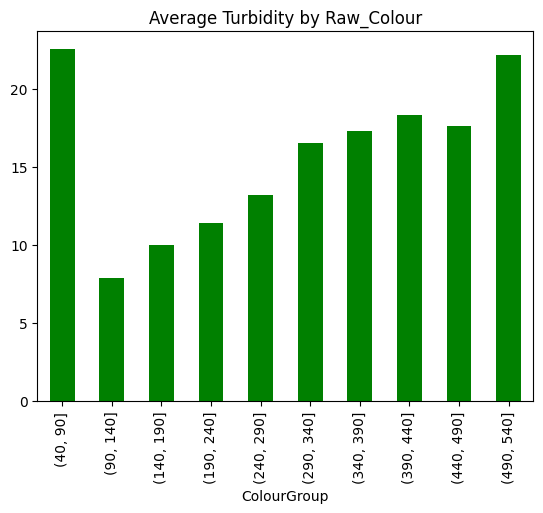

In [ ]:
df.groupby('ColourGroup')['Turbidity'].mean().plot.bar(color='green')
plt.title('Average Turbidity vs Raw_Colour')
plt.show()

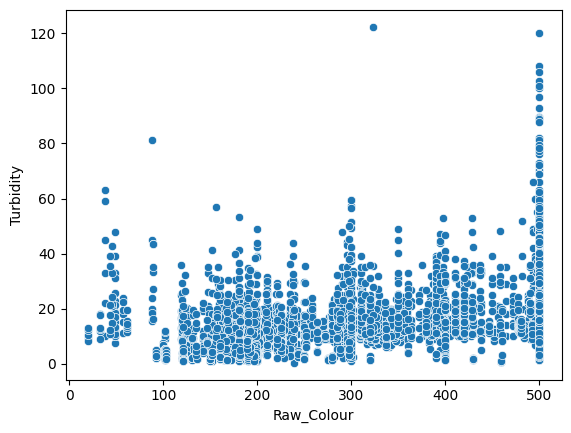

In [ ]:
sns.scatterplot(data=df, x='Raw_Colour', y='Turbidity')
plt.show()


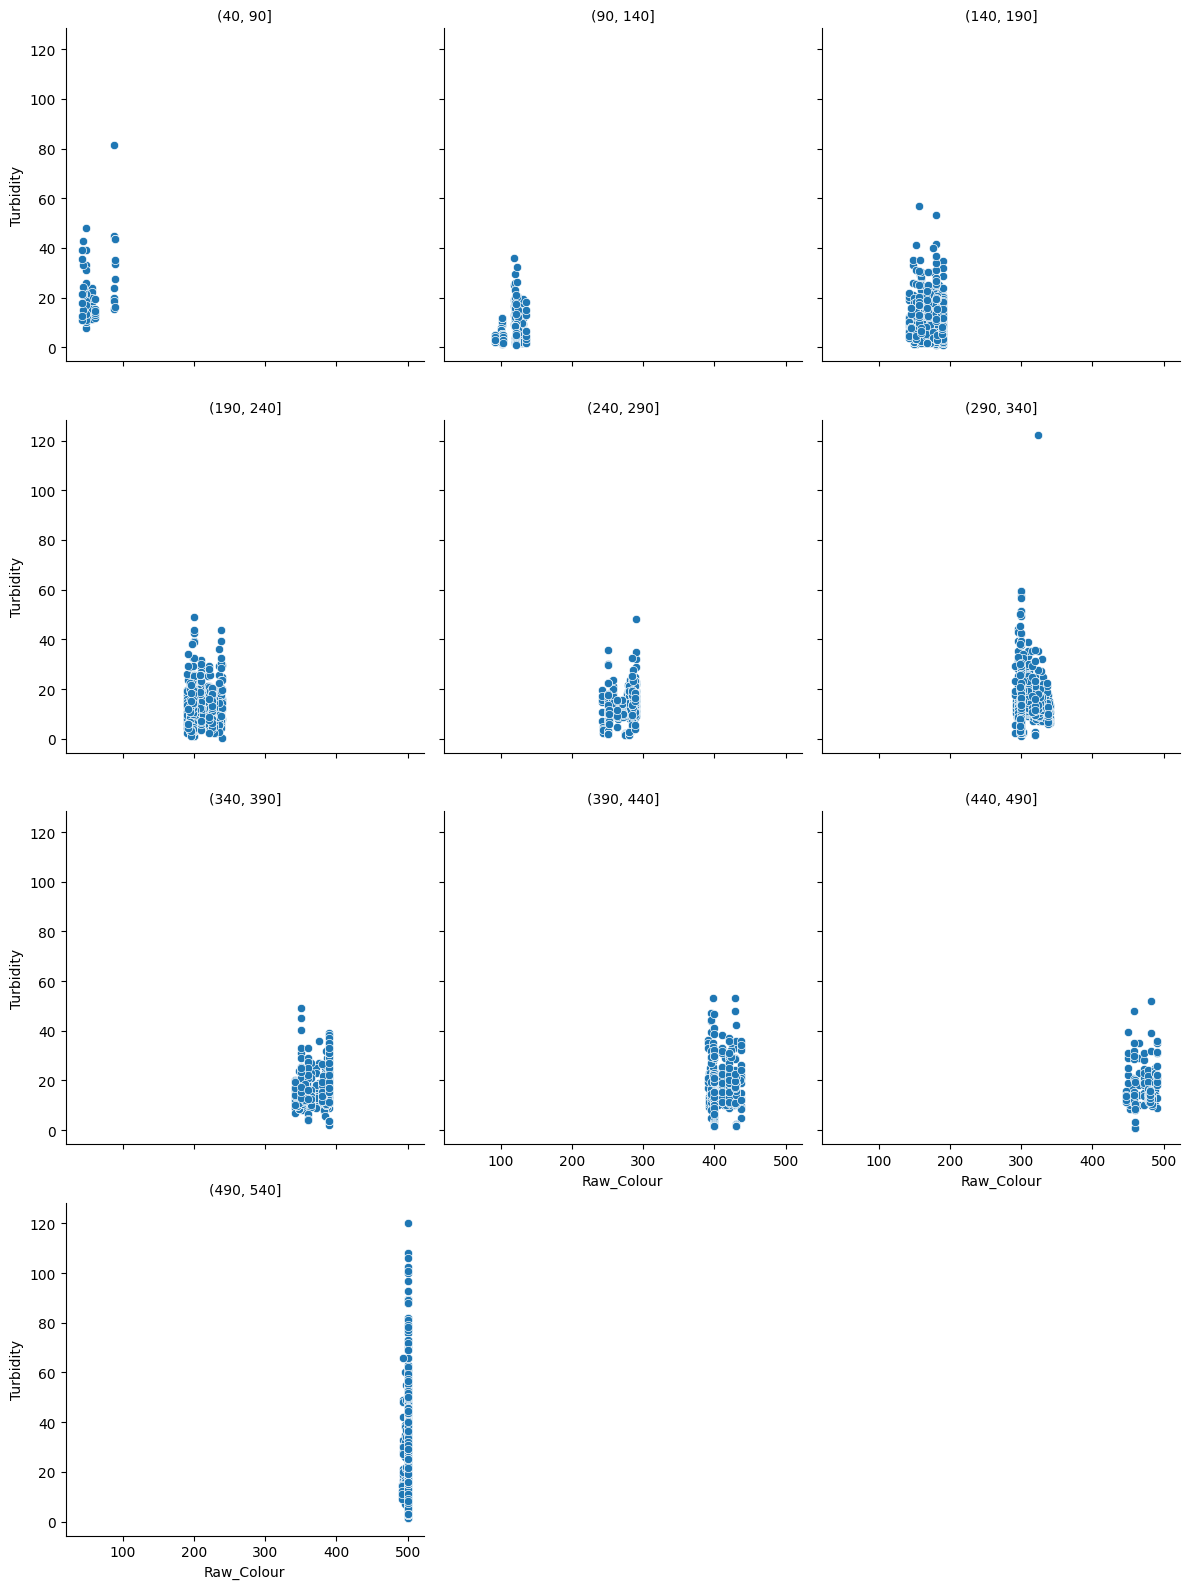

In [ ]:
g = sns.FacetGrid(df, col="ColourGroup", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="Raw_Colour", y="Turbidity")
g.set_axis_labels("Raw_Colour", "Turbidity")
g.set_titles(col_template="{col_name}")
plt.show()
# how turbidity behaves within those grouped ranges.


**Raw_PH vs Turbidity**

In [ ]:
df = pd.DataFrame({'Raw_PH': [4.5, 5.2, 6.8, 7.0, 8.9, 5.5, 6.2, 4.1]})  # created data frame



In [ ]:
df['PH_Group'] = pd.cut(df['Raw_PH'], bins=[4, 5.5, 7, 8.5, 10], labels=['Low', 'Medium', 'High', 'Very High'])
print(df)
#df with the Raw_PH

   Raw_PH   PH_Group
0     4.5        Low
1     5.2        Low
2     6.8     Medium
3     7.0     Medium
4     8.9  Very High
5     5.5        Low
6     6.2     Medium
7     4.1        Low


In [ ]:
#  PH_Group and get average Turbidity
mean_turbidity = df.groupby('PH_Group')['Turbidity'].mean()



/tmp/ipython-input-26-4187014994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_turbidity = df.groupby('PH_Group')['Turbidity'].mean()


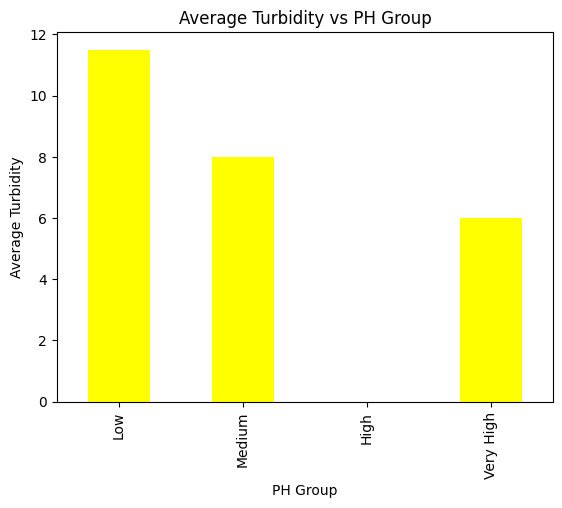

In [ ]:
# Plot bar chart
mean_turbidity.plot(kind='bar', color='yellow')
plt.title('Average Turbidity vs PH Group')
plt.ylabel('Average Turbidity')
plt.xlabel('PH Group')
plt.show()

In [ ]:
#create data frame
df = pd.DataFrame({
    'Raw_PH': [4.5, 5.2, 6.8, 7.0, 8.9, 5.5, 6.2, 4.1],
    'Turbidity': [10, 12, 7, 8, 6, 11, 9, 13]
})


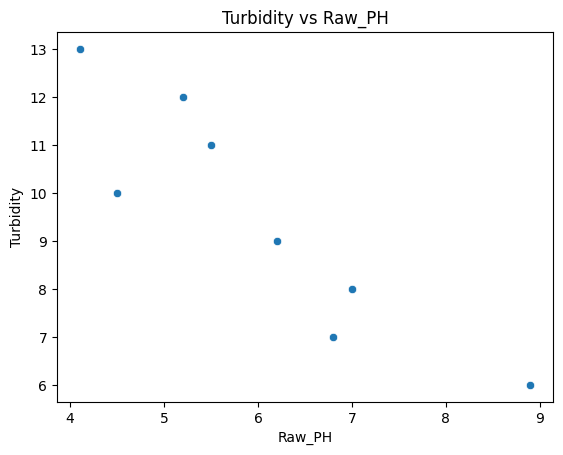

In [ ]:
sns.scatterplot(data=df, x='Raw_PH', y='Turbidity')
plt.title('Turbidity vs Raw_PH')
plt.show()

**PAC vs Turbidity**

In [ ]:

# Sample data with PAC from 2 to 8
df = pd.DataFrame({
    'Raw_PH': [4.5, 5.2, 6.8, 7.0, 8.9, 5.5, 6.2, 4.1],
    'Turbidity': [10, 12, 7, 8, 6, 11, 9, 13],
    'PAC': [2.1, 3.5, 4.0, 5.5, 7.0, 6.2, 3.0, 8.0]
})

In [11]:
# Create PH_Group bins for grouping
df['PH_Group'] = pd.cut(df['Raw_PH'],
                        bins=[4,5.5,7,8.5,10],
                        labels=['Low','Medium','High','Very High'])


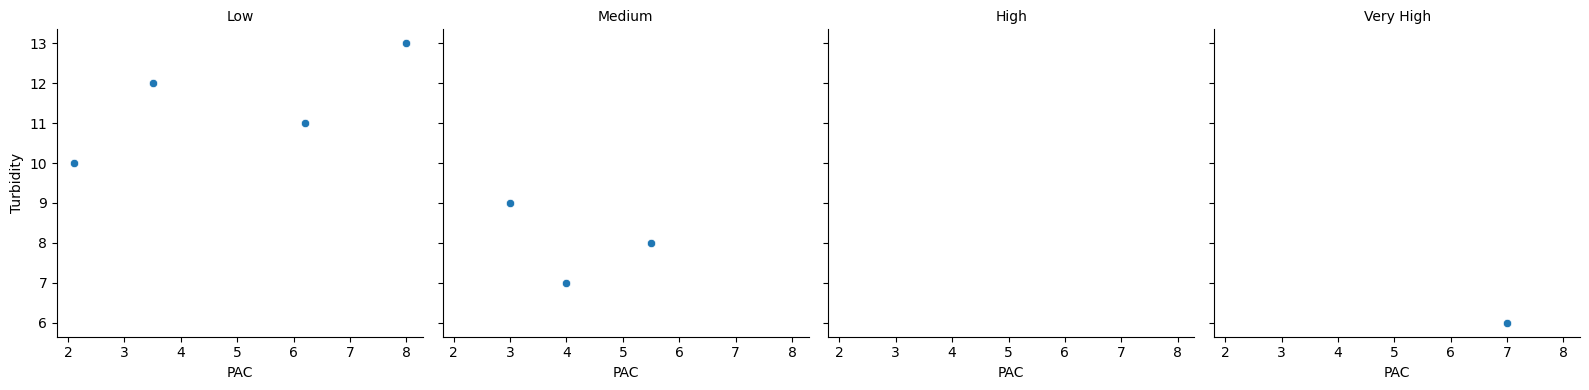

In [ ]:
#scatter plot Turbidity vs PAC
g = sns.FacetGrid(df, col="PH_Group", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="PAC", y="Turbidity")
g.set_axis_labels("PAC", "Turbidity")
g.set_titles(col_template="{col_name}")
plt.show()

**Turbidity Vs KMNO4**

In [ ]:

# Sample data with KMNO4
df = pd.DataFrame({
    'Raw_PH': [4.5, 5.2, 6.8, 7.0, 8.9, 5.5, 6.2, 4.1],
    'Turbidity': [10, 12, 7, 8, 6, 11, 9, 13],
    'KMNO4': [0.010, 0.15, 0.22, 0.35, 0.80, 0.60, 0.40, 1.00]
})


In [10]:
# Create PH_Group bins for grouping
df['PH_Group'] = pd.cut(df['Raw_PH'],
                        bins=[4,5.5,7,8.5,10],
                        labels=['Low','Medium','High','Very High'])


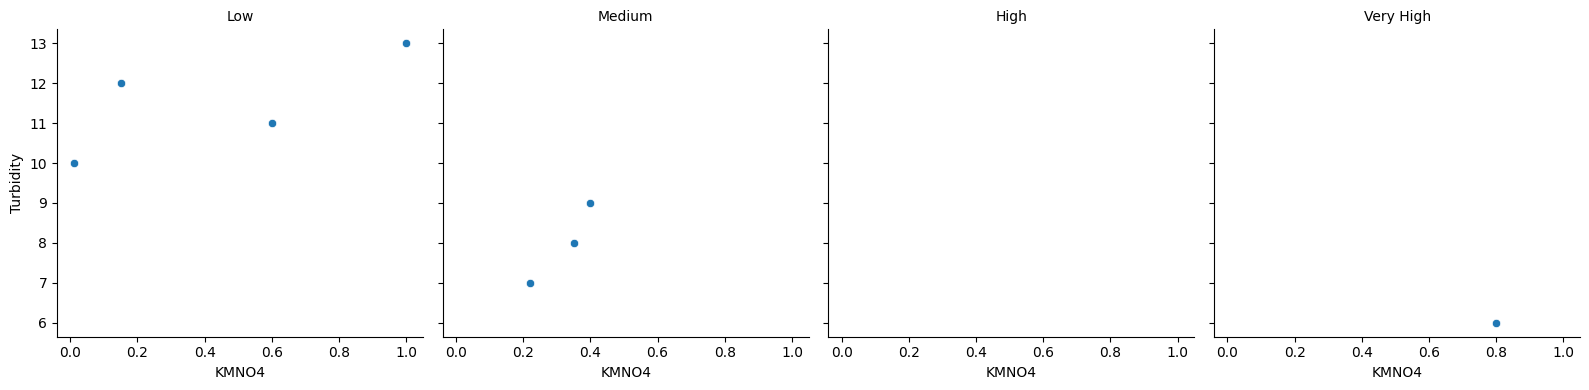

In [ ]:
# scatter plot Turbidity vs KMNO4
g = sns.FacetGrid(df, col="PH_Group", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="KMNO4", y="Turbidity")
g.set_axis_labels("KMNO4", "Turbidity")
g.set_titles(col_template="{col_name}")
plt.show()

**ACD vs Turbiidty**



In [ ]:

# Sample data with ACD from 0.10 to 1.00
df = pd.DataFrame({
    'Raw_PH': [4.5, 5.2, 6.8, 7.0, 8.9, 5.5, 6.2, 4.1],
    'Turbidity': [10, 12, 7, 8, 6, 11, 9, 13],
    'ACD': [0.10, 0.25, 0.35, 0.50, 0.90, 0.70, 0.60, 1.00]
})


In [9]:
# Create PH_Group bins
df['PH_Group'] = pd.cut(df['Raw_PH'], bins=[4, 5.5, 7, 8.5, 10],

                        labels=['Low', 'Medium', 'High', 'Very High'])


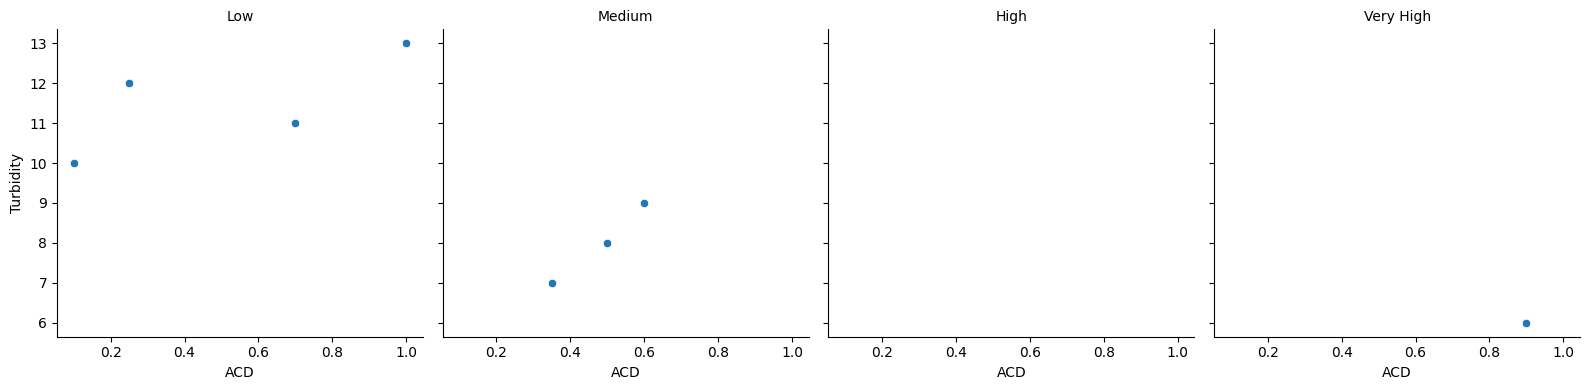

In [ ]:
# scatter plot Turbidity vs ACD
g = sns.FacetGrid(df, col="PH_Group", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="ACD", y="Turbidity")
g.set_axis_labels("ACD", "Turbidity")
g.set_titles(col_template="{col_name}")
plt.show()

In [4]:
import pandas as pd

# Sample data with Raw_Turbidty from 2.1 to 500.0
df = pd.DataFrame({
    'Raw_PH': [4.5, 5.2, 6.8, 7.0, 8.9, 5.5, 6.2, 4.1],
    'Turbidity': [10, 12, 7, 8, 6, 11, 9, 13],
    'Raw_Turbidity': [2.1, 50.0, 100.0, 150.0, 250.0, 350.0, 400.0, 500.0]
})

In [8]:
# Create PH_Group bins
df['PH_Group'] = pd.cut(df['Raw_PH'], bins=[4, 5.5, 7, 8.5, 10],
                  labels=['Low', 'Medium', 'High', 'Very High'])


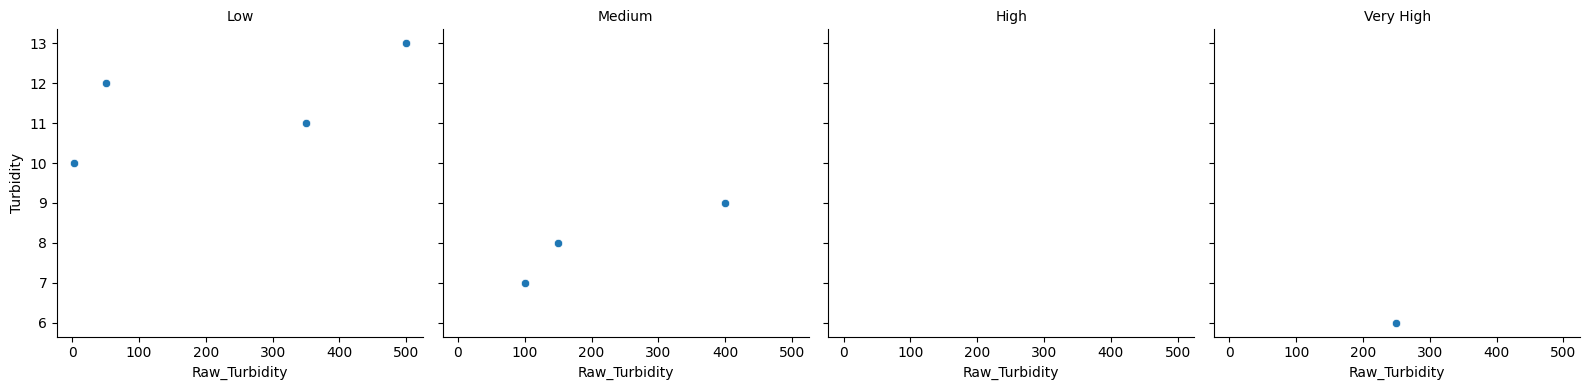

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# scatter plot Turbidity vs Raw_Turbidity
g = sns.FacetGrid(df, col="PH_Group", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="Raw_Turbidity", y="Turbidity")
g.set_axis_labels("Raw_Turbidity", "Turbidity")
g.set_titles(col_template="{col_name}")
plt.show()

#**Key insights of turbidity**

Most Influential Attributes -  

*   Raw_Colour(Strongest correlation with turbidity)
*   Raw_Turbidity(Direct and expected contributor.)
                     
Moderate/Low Impact Attributes -
*  PAC & KMnO4(treatment chemicals .so they should reduce turbidity)

# **Summery(impact order)**

 **Most Impactful → Least Impactful order**

Raw_Colour, Raw_Turbidity, KMnO4, PAC, Raw_PH, ACD


#Analyzing PH with 6 features

 **PH vs Raw_PH**

In [4]:

# Sample data (Raw_PH range: 6.19 to 8.99)
df = pd.DataFrame({
    'Raw_PH': [6.2, 6.5, 6.8, 7.0, 7.5, 8.0, 8.5, 8.9],
    'PH':     [6.3, 6.7, 7.0, 7.1, 7.6, 8.1, 8.6, 9.0]
})



In [5]:
# Bin Raw_PH into categories
df['PH_Group'] = pd.cut(df['Raw_PH'], bins=[6, 7, 8, 9], labels=['Low', 'Medium', 'High'])


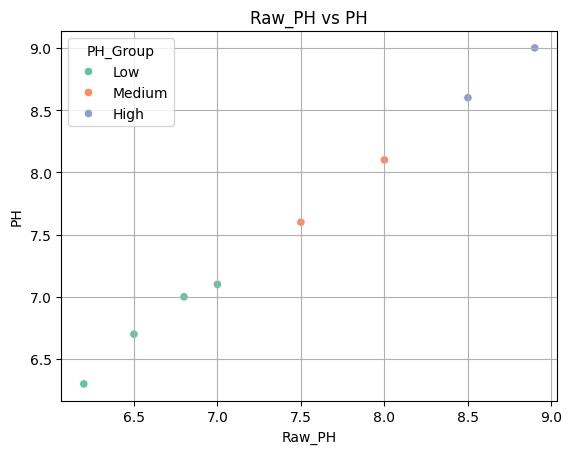

   Raw_PH   PH PH_Group
0     6.2  6.3      Low
1     6.5  6.7      Low
2     6.8  7.0      Low
3     7.0  7.1      Low
4     7.5  7.6   Medium
5     8.0  8.1   Medium
6     8.5  8.6     High
7     8.9  9.0     High


In [6]:
# Scatter plot
sns.scatterplot(data=df, x='Raw_PH', y='PH', hue='PH_Group', palette='Set2')
plt.title('Raw_PH vs PH')
plt.grid(True)
plt.show()

print(df)


insight:


**Raw_PH and PH show a positive linear relationship across all groups.**

**PH vs KMNO4**

In [8]:

# Sample data (KMnO₄ range: 0.20 to 0.50)
df = pd.DataFrame({
    'PH':     [6.3, 6.7, 7.0, 7.1, 7.6, 8.1, 8.6, 9.0],
    'KMnO4':  [0.20, 0.25, 0.30, 0.32, 0.38, 0.42, 0.45, 0.50]
})


In [9]:
# Bin KMnO₄ values
df['KMnO4_Group'] = pd.cut(df['KMnO4'], bins=[0.2, 0.3, 0.4, 0.5], labels=['Low', 'Medium', 'High'])


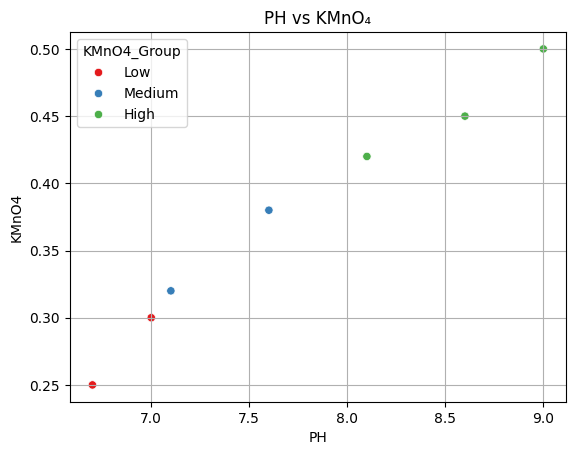

    PH  KMnO4 KMnO4_Group
0  6.3   0.20         NaN
1  6.7   0.25         Low
2  7.0   0.30         Low
3  7.1   0.32      Medium
4  7.6   0.38      Medium
5  8.1   0.42        High
6  8.6   0.45        High
7  9.0   0.50        High


In [10]:
# Scatter plot
sns.scatterplot(data=df, x='PH', y='KMnO4', hue='KMnO4_Group', palette='Set1')
plt.title('PH vs KMnO₄')
plt.grid(True)
plt.show()
print(df)

insight :

**KMnO₄ increases as PH increases, showing a positive trend across Low, Medium, and High groups.**

**PH vs PAC**

In [12]:
# Sample data (PAC range: 2.0 to 7.5)
df = pd.DataFrame({
    'PH':  [6.3, 6.7, 7.0, 7.1, 7.6, 8.1, 8.6, 9.0],
    'PAC': [2.0, 2.8, 3.5, 4.0, 5.0, 6.0, 7.0, 7.5]
})

In [13]:
# Bin PAC values
df['PAC_Group'] = pd.cut(df['PAC'], bins=[2, 4, 6, 8], labels=['Low', 'Medium', 'High'])


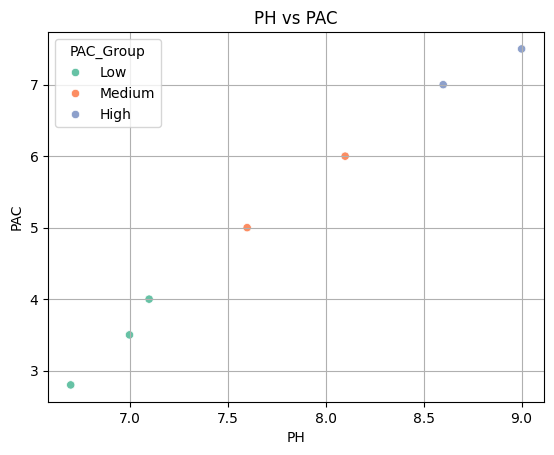

    PH  PAC PAC_Group
0  6.3  2.0       NaN
1  6.7  2.8       Low
2  7.0  3.5       Low
3  7.1  4.0       Low
4  7.6  5.0    Medium
5  8.1  6.0    Medium
6  8.6  7.0      High
7  9.0  7.5      High


In [14]:
# Scatter plot
sns.scatterplot(data=df, x='PH', y='PAC', hue='PAC_Group', palette='Set2')
plt.title('PH vs PAC')
plt.grid(True)
plt.show()
print(df)

insiht :
**PAC increases with PH, indicating a positive trend across Low, Medium, and High ranges.**

**Raw_Colour vs PH**

In [16]:
# Sample data (Raw_Colour range: 198 to 500)
df = pd.DataFrame({
    'PH':         [6.3, 6.7, 7.0, 7.1, 7.6, 8.1, 8.6, 9.0],
    'Raw_Colour': [198, 220, 250, 300, 350, 400, 450, 500]
})

In [17]:
# Bin Raw_Colour values
df['Colour_Group'] = pd.cut(df['Raw_Colour'], bins=[190, 280, 370, 500], labels=['Low', 'Medium', 'High'])

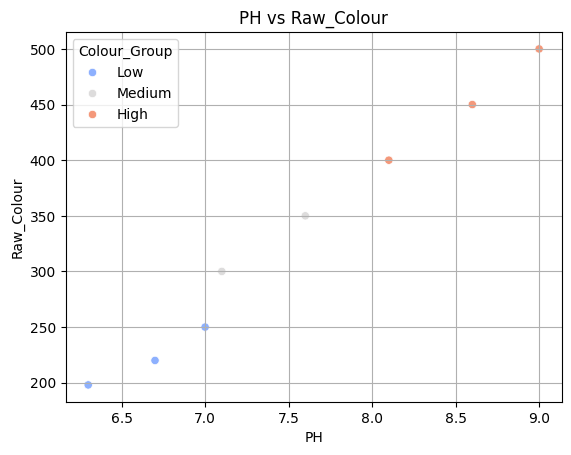

    PH  Raw_Colour Colour_Group
0  6.3         198          Low
1  6.7         220          Low
2  7.0         250          Low
3  7.1         300       Medium
4  7.6         350       Medium
5  8.1         400         High
6  8.6         450         High
7  9.0         500         High


In [18]:
# Scatter plot
sns.scatterplot(data=df, x='PH', y='Raw_Colour', hue='Colour_Group', palette='coolwarm')
plt.title('PH vs Raw_Colour')
plt.grid(True)
plt.show()

print(df)

insight :

**Raw_Colour increases with PH, showing a positive relationship across all colour levels.**

**ACD vs PH**

In [20]:

# Sample data (ACD range: 0.35 to 0.75)
df = pd.DataFrame({
    'ACD': [0.35, 0.40, 0.45, 0.50, 0.60, 0.65, 0.70, 0.75],
    'PH':  [6.3, 6.6, 6.9, 7.1, 7.4, 7.8, 8.2, 8.6]
})

In [21]:
# Bin ACD values
df['ACD_Group'] = pd.cut(df['ACD'], bins=[0.3, 0.5, 0.65, 0.8], labels=['Low', 'Medium', 'High'])

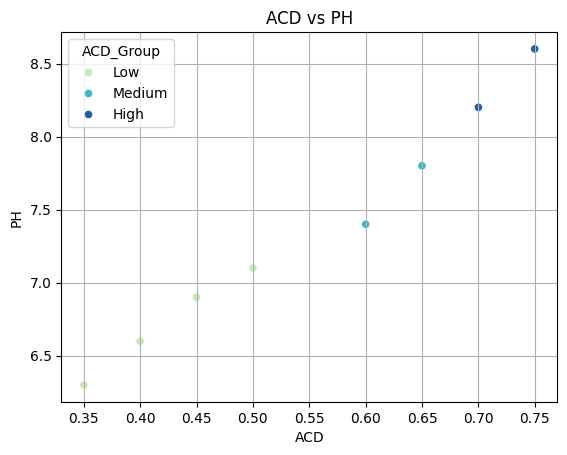

    ACD   PH ACD_Group
0  0.35  6.3       Low
1  0.40  6.6       Low
2  0.45  6.9       Low
3  0.50  7.1       Low
4  0.60  7.4    Medium
5  0.65  7.8    Medium
6  0.70  8.2      High
7  0.75  8.6      High


In [22]:
# Scatter plot
sns.scatterplot(data=df, x='ACD', y='PH', hue='ACD_Group', palette='YlGnBu')
plt.title('ACD vs PH')
plt.grid(True)
plt.show()
print(df)


insight:

**PH increases with ACD, indicating a positive trend across ACD levels.**

**PH vs Raw_Turbidity**

In [24]:

# Sample data (Raw_Turbidity range: 15.0 to 496.0)
df = pd.DataFrame({
    'Raw_Turbidity': [15.0, 50.0, 100.0, 150.0, 250.0, 350.0, 420.0, 496.0],
    'PH':            [6.2, 6.5, 6.8, 7.1, 7.4, 7.8, 8.3, 8.7]
})


In [25]:
# Bin Raw_Turbidity values
df['Turbidity_Group'] = pd.cut(df['Raw_Turbidity'], bins=[10, 150, 300, 500], labels=['Low', 'Medium', 'High'])


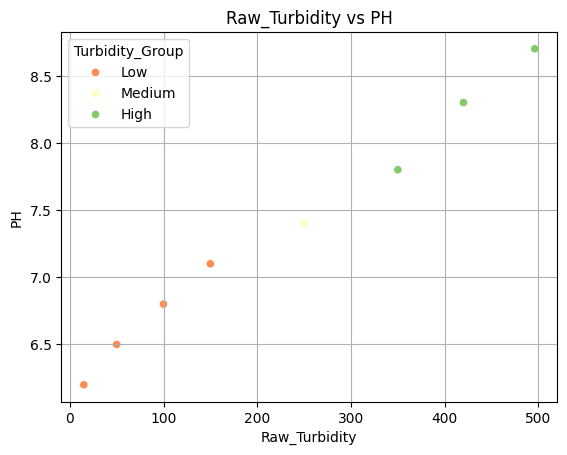

   Raw_Turbidity   PH Turbidity_Group
0           15.0  6.2             Low
1           50.0  6.5             Low
2          100.0  6.8             Low
3          150.0  7.1             Low
4          250.0  7.4          Medium
5          350.0  7.8            High
6          420.0  8.3            High
7          496.0  8.7            High


In [26]:
# Scatter plot
sns.scatterplot(data=df, x='Raw_Turbidity', y='PH', hue='Turbidity_Group', palette='RdYlGn')
plt.title('Raw_Turbidity vs PH')
plt.grid(True)
plt.show()
print(df)

insight :

**PH rises with Raw_Turbidity, showing a positive trend across all turbidity levels.**

# Analyzing Colour with 6 features

**Colour vs KMNO4**


In [32]:

# Sample data (Colour: 9.0 – 220.0, KMnO₄: 0.2 – 0.5)
df = pd.DataFrame({
    'Colour': [9.0, 30.0, 60.0, 100.0, 140.0, 170.0, 200.0, 220.0],
    'KMnO4':      [0.20, 0.23, 0.26, 0.30, 0.34, 0.38, 0.44, 0.50]
})


In [33]:
# Bin Colour
df['Colour_Group'] = pd.cut(df['Colour'], bins=[0, 80, 160, 230], labels=['Low', 'Medium', 'High'])

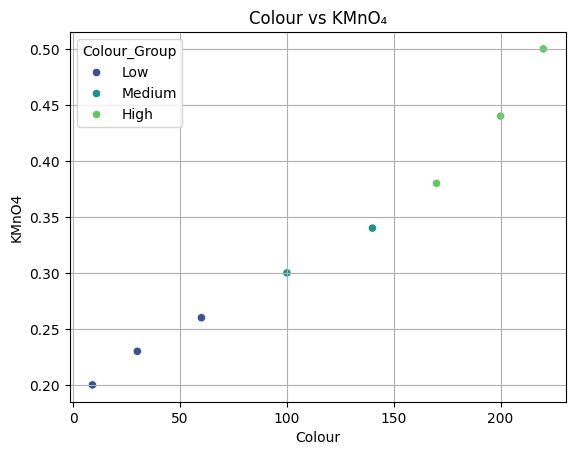

   Colour  KMnO4 Colour_Group
0     9.0   0.20          Low
1    30.0   0.23          Low
2    60.0   0.26          Low
3   100.0   0.30       Medium
4   140.0   0.34       Medium
5   170.0   0.38         High
6   200.0   0.44         High
7   220.0   0.50         High


In [34]:
# Scatter plot
sns.scatterplot(data=df, x='Colour', y='KMnO4', hue='Colour_Group', palette='viridis')
plt.title('Colour vs KMnO₄')
plt.grid(True)
plt.show()
print(df)

Insight:

**Between 9–220, Colour and KMnO₄ show little to no correlation, with points scattered randomly.**

**Colur vs Raw_colour**

In [36]:

# Sample data (Colour: 9–220, Raw_Colour: 198–500)
df = pd.DataFrame({
    'Colour':     [9, 30, 60, 100, 140, 170, 200, 220],
    'Raw_Colour': [198, 220, 250, 300, 350, 400, 450, 500]
})


In [37]:
# Bin Colour values
df['Colour_Group'] = pd.cut(df['Colour'], bins=[0, 80, 160, 230], labels=['Low', 'Medium', 'High'])

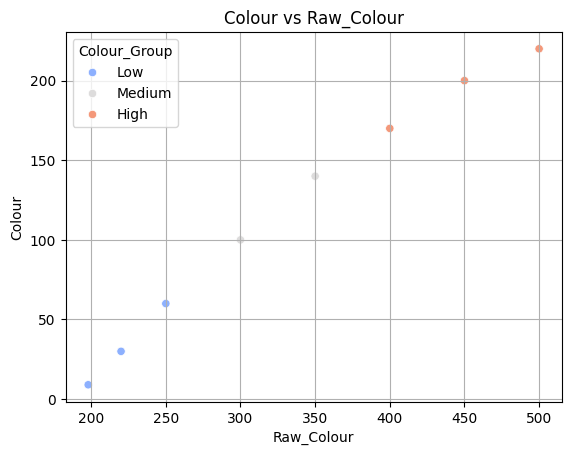

   Colour  Raw_Colour Colour_Group
0       9         198          Low
1      30         220          Low
2      60         250          Low
3     100         300       Medium
4     140         350       Medium
5     170         400         High
6     200         450         High
7     220         500         High


In [40]:
# Scatter plot
sns.scatterplot(data=df, x='Raw_Colour', y='Colour', hue='Colour_Group', palette='coolwarm')
plt.title('Colour vs Raw_Colour')
plt.grid(True)
plt.show()

print(df)

Insight :

**Colour increases with Raw_Colour, showing a strong positive correlation across the full range.**

**Colur vs Raw_Turbidity**

In [41]:

# Sample data (Colour: 9–220, Raw_Turbidity: 21.1–496.0)
df = pd.DataFrame({
    'Colour':         [9, 30, 60, 100, 140, 170, 200, 220],
    'Raw_Turbidity':  [21.1, 80.0, 120.0, 200.0, 300.0, 380.0, 420.0, 496.0]
})


In [42]:
# Bin Raw_Turbidity
df['Turbidity_Group'] = pd.cut(df['Raw_Turbidity'], bins=[20, 150, 300, 500], labels=['Low', 'Medium', 'High'])

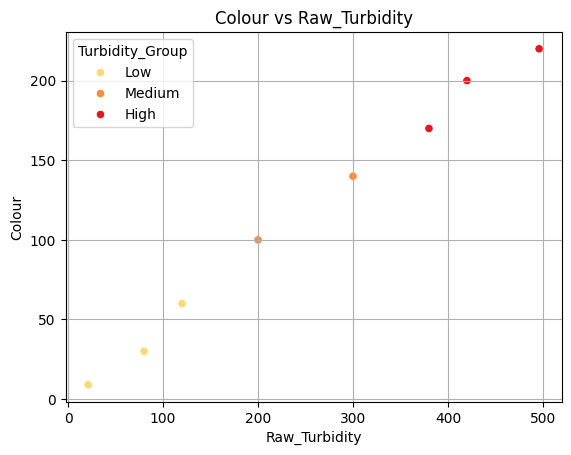

   Colour  Raw_Turbidity Turbidity_Group
0       9           21.1             Low
1      30           80.0             Low
2      60          120.0             Low
3     100          200.0          Medium
4     140          300.0          Medium
5     170          380.0            High
6     200          420.0            High
7     220          496.0            High


In [43]:
# Scatter plot
sns.scatterplot(data=df, x='Raw_Turbidity', y='Colour', hue='Turbidity_Group', palette='YlOrRd')
plt.title('Colour vs Raw_Turbidity')
plt.grid(True)
plt.show()

print(df)


Insight :

**Colour increases with Raw_Turbidity, showing a moderate positive correlation, especially in higher turbidity ranges.**

**Colur vs KMNO4**

In [45]:

# Sample data (Colour: 9–220, KMnO₄: 0.20–0.50)
df = pd.DataFrame({
    'Colour': [9, 30, 60, 100, 140, 170, 200, 220],
    'KMnO4':  [0.20, 0.24, 0.27, 0.30, 0.36, 0.40, 0.45, 0.50]
})


In [46]:
# Bin Colour
df['Colour_Group'] = pd.cut(df['Colour'], bins=[0, 80, 160, 230], labels=['Low', 'Medium', 'High'])

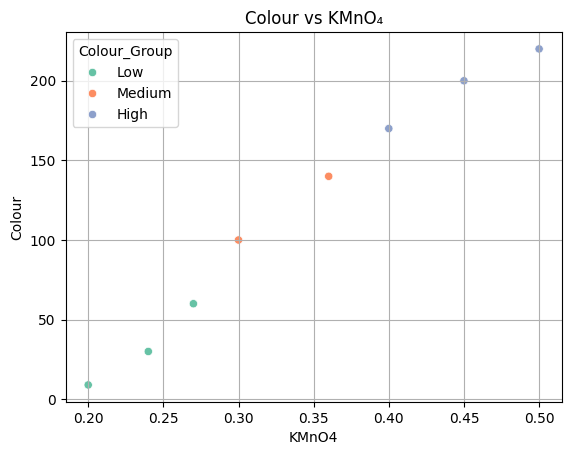

   Colour  KMnO4 Colour_Group
0       9   0.20          Low
1      30   0.24          Low
2      60   0.27          Low
3     100   0.30       Medium
4     140   0.36       Medium
5     170   0.40         High
6     200   0.45         High
7     220   0.50         High


In [47]:
# Scatter plot
sns.scatterplot(data=df, x='KMnO4', y='Colour', hue='Colour_Group', palette='Set2')
plt.title('Colour vs KMnO₄')
plt.grid(True)
plt.show()

print(df)

Insight :

**Indicates a very weak or no clear correlation between Colour and KMnO₄.**

**Colur  vs PAC**

In [50]:

# Sample data (Colour: 9–220, PAC: 2.0–7.5)
df = pd.DataFrame({
    'Colour': [9, 30, 60, 100, 140, 170, 200, 220],
    'PAC':    [2.0, 2.5, 3.2, 4.0, 5.0, 6.0, 6.8, 7.5]
})

In [51]:
# Bin Colour values
df['Colour_Group'] = pd.cut(df['Colour'], bins=[0, 80, 160, 230], labels=['Low', 'Medium', 'High'])

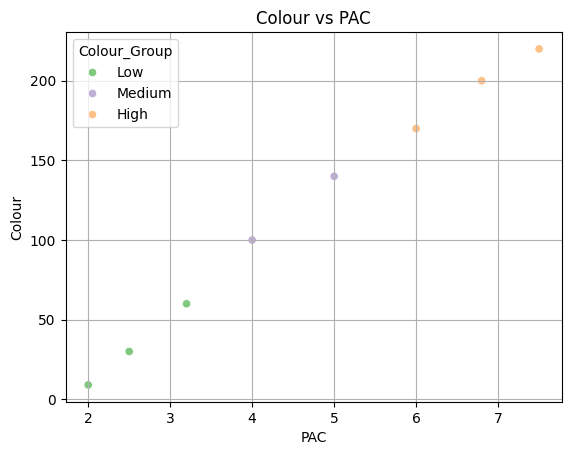

   Colour  PAC Colour_Group
0       9  2.0          Low
1      30  2.5          Low
2      60  3.2          Low
3     100  4.0       Medium
4     140  5.0       Medium
5     170  6.0         High
6     200  6.8         High
7     220  7.5         High


In [52]:
# Scatter plot
sns.scatterplot(data=df, x='PAC', y='Colour', hue='Colour_Group', palette='Accent')
plt.title('Colour vs PAC')
plt.grid(True)
plt.show()

print(df)

Insight:

**showing little to no clear relationship between Colour and PAC.**

**Colur vs ACD**

In [55]:

# Sample data (Colour: 9–220, ACD: 0.35–0.75)
df = pd.DataFrame({
    'Colour': [9, 30, 60, 100, 140, 170, 200, 220],
    'ACD':    [0.35, 0.40, 0.45, 0.50, 0.58, 0.65, 0.70, 0.75]
})

In [56]:
# Bin Colour values
df['Colour_Group'] = pd.cut(df['Colour'], bins=[0, 80, 160, 230], labels=['Low', 'Medium', 'High'])

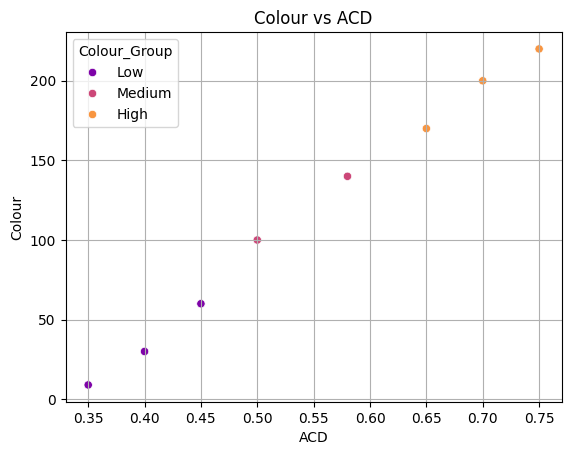

   Colour   ACD Colour_Group
0       9  0.35          Low
1      30  0.40          Low
2      60  0.45          Low
3     100  0.50       Medium
4     140  0.58       Medium
5     170  0.65         High
6     200  0.70         High
7     220  0.75         High


In [57]:
# Scatter plot
sns.scatterplot(data=df, x='ACD', y='Colour', hue='Colour_Group', palette='plasma')
plt.title('Colour vs ACD')
plt.grid(True)
plt.show()

print(df)


Insight :

**Indicating a weak to moderate correlation between Colour and ACD.**

**Colur vs Raw_Ph**

In [59]:

# Sample data (Colour: 9–220, Raw_PH: 5.00–8.00)
df = pd.DataFrame({
    'Colour':  [9, 30, 60, 100, 140, 170, 200, 220],
    'Raw_PH':  [5.00, 5.80, 6.20, 6.50, 6.90, 7.30, 7.70, 8.00]
})


In [60]:
# Bin Colour values
df['Colour_Group'] = pd.cut(df['Colour'], bins=[0, 80, 160, 230], labels=['Low', 'Medium', 'High'])

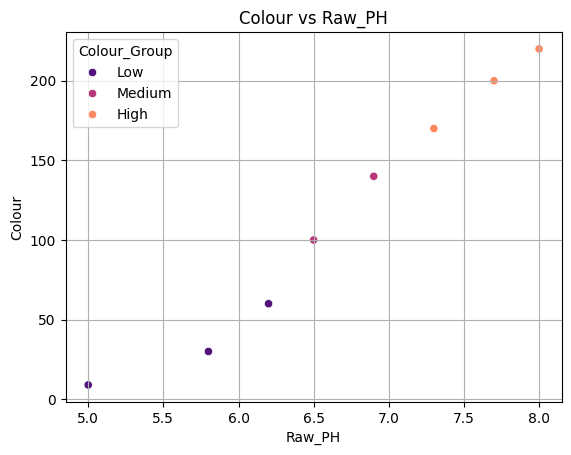

   Colour  Raw_PH Colour_Group
0       9     5.0          Low
1      30     5.8          Low
2      60     6.2          Low
3     100     6.5       Medium
4     140     6.9       Medium
5     170     7.3         High
6     200     7.7         High
7     220     8.0         High


In [61]:
# Scatter plot
sns.scatterplot(data=df, x='Raw_PH', y='Colour', hue='Colour_Group', palette='magma')
plt.title('Colour vs Raw_PH')
plt.grid(True)
plt.show()

print(df)


Insight :

**Colour generally increases with Raw_PH, showing a mild positive trend**